Enter Account Number : 100114
Account Matches for 100114
Account Number : 100114 is eligible for loan
Balance of last three transactions are : [290000 310000 260000]
Enter the loan amount : 500500
Loan Balance Amount is : 268500.0
Interest rate is: 0.037
Number of years are: 10
Enter the loan start date in format 'YYYY-MM-DD' :2019-12-30
Date picked is : 2019-12-30
Adjust Interest rate : 0.0030833333333333333
-2680.31
              Beginning Balance  Payment  Principal  Interest  Ending Balance
Payment Date                                                                 
2019-12-31            268500.00  2680.31    1852.44    827.88       266647.13
2020-01-31            266647.13  2680.31    1858.15    822.16       264788.99
2020-02-29            264788.99  2680.31    1863.88    816.43       262925.11
2020-03-31            262925.11  2680.31    1869.63    810.69       261055.48
2020-04-30            261055.48  2680.31    1875.39    804.92       259180.09
              Beginning Balance 

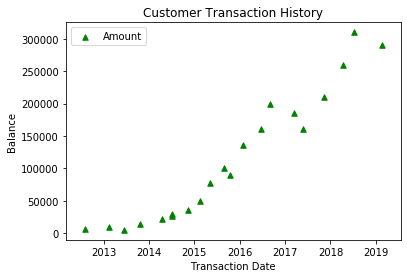

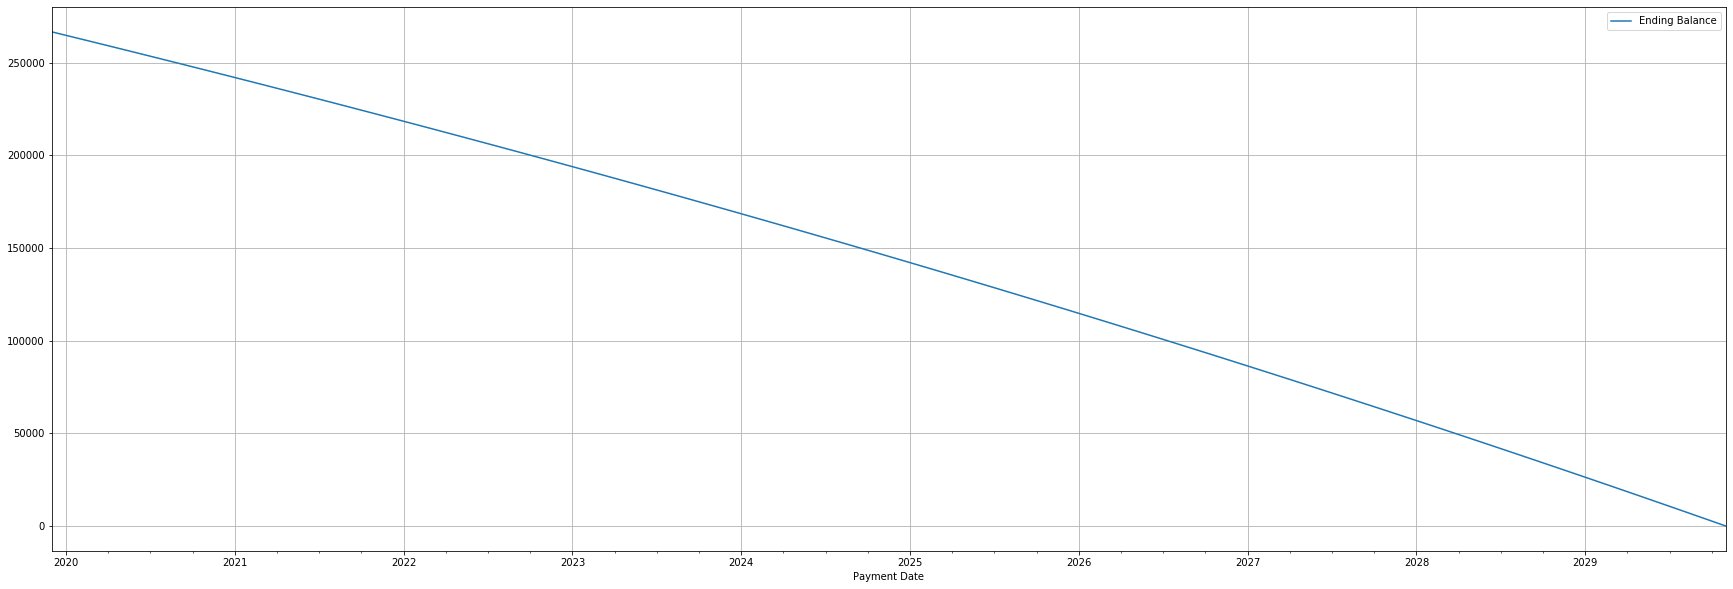

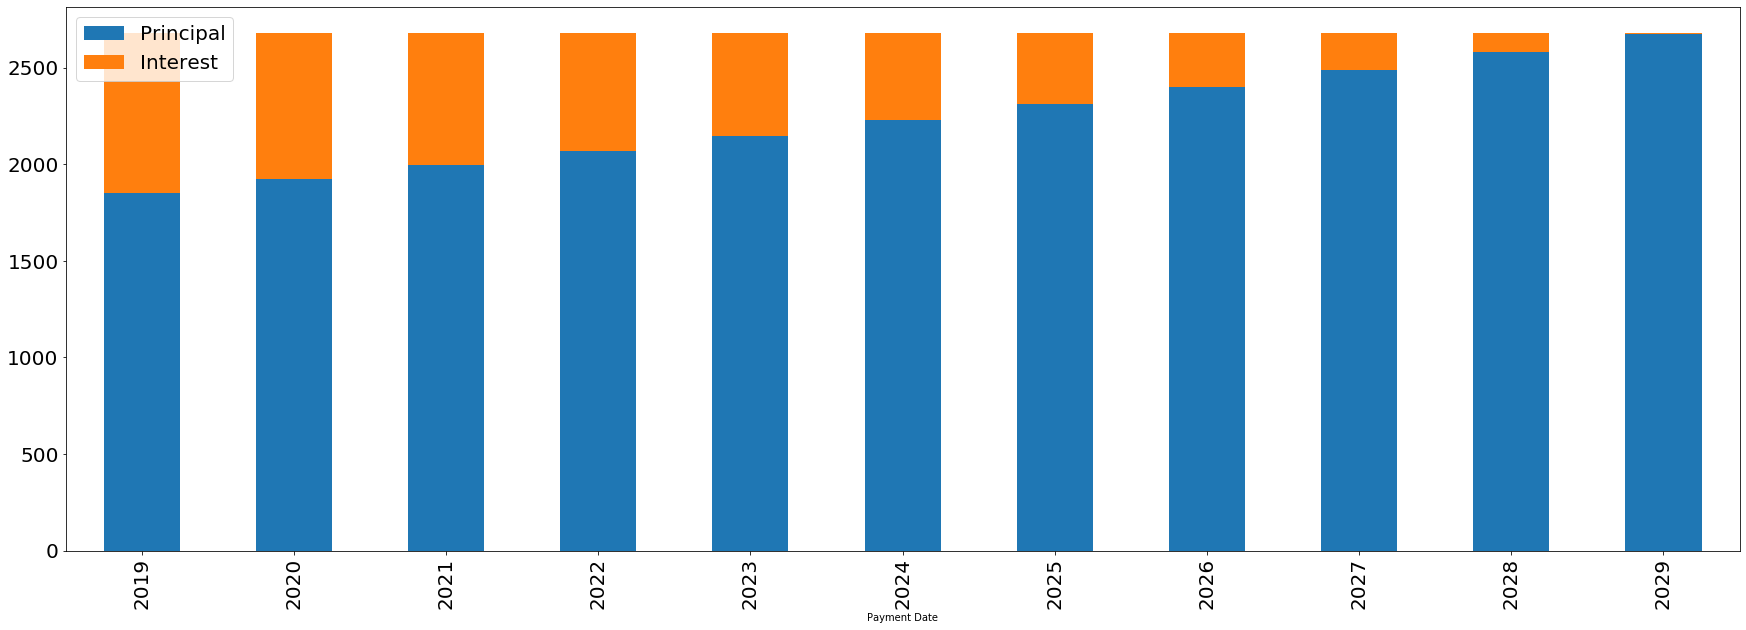

In [8]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
import datetime
from datetime import date
customer_excel="C:/Users/Kalyani/Desktop/Python/Python Project2/Customer_Details.xlsx"
customer_names=['Account Number','Name','City','SSN','Bank Name','Balance','Transaction Date','Transaction Amount','Transaction Type','Credit Score','Background','Occupation','Age']
customer=pd.read_excel(customer_excel,names=customer_names)

bank_excel="C:/Users/Kalyani/Desktop/Python/Python Project2/Bank_Details.xlsx"
bank_names=['SrNo','Loan Amount Min','Loan Amount Max','Loan Term','Interest Rate','Occupation','Age Min','Age Max']
bank=pd.read_excel(bank_excel,names=bank_names)

def loan_calculator(customerdf1):
    loan_amt=float(input("Enter the loan amount : "))
    
    #20% of the balance should be kept in the bank
    balance=int(customerdf1["Balance"].head(1))-int(customerdf1["Balance"].head(1))*20/100
    if balance <7000:
        print("Initial balance that should be kept is less than 7000")
        return
    loan_bal_amt=loan_amt-balance 
    if loan_bal_amt <0:
        print("Loan Balance Amount is : {}. No Need to take loan".format(loan_bal_amt))
        return
    else:
        print("Loan Balance Amount is : {}".format(loan_bal_amt))
    
    #Check whether the loan amount fits in which criteria of the bank
    bankdf_min=bank.loc[bank['Loan Amount Min']<=loan_bal_amt].tail(1)
    bankdf_max=bank.loc[bank['Loan Amount Max']>=loan_bal_amt].head(1)

    if bankdf_min['SrNo'].values in bankdf_max['SrNo'].values:
        interest_rate=float(bankdf_min["Interest Rate"].values)
        no_of_years=int(bankdf_min["Loan Term"].values)
        print("Interest rate is: {}".format(interest_rate))
        print("Number of years are: {}".format(no_of_years))
    num_payments_per_yr=12
        
    
    #Date format conversion
    date_entry=input("Enter the loan start date in format 'YYYY-MM-DD' :" )
    date_input=datetime.datetime.strptime(date_entry, '%Y-%m-%d').date()
    #Avoid previous years date
    if date_input <date.today():
        print("Date: {} is invalid ".format("date_input"))
        return
    print("Date picked is : {}".format(date_input))
    year, month, day = map(int, date_entry.split('-'))
    start_date = date(year, month, day)
    #print(start_date)
    
    #interest_rate=interest/100
    adj_interest_rate = interest_rate / num_payments_per_yr
    print ("Adjust Interest rate : {}".format(adj_interest_rate))
    num_periods = no_of_years * num_payments_per_yr
    #Define the payment dates using a date_range object
    rng=pd.date_range(start_date, periods=num_periods, freq='M')
    rng.name = 'Payment Date'
    
    
    #Monthly payment
    pmt=round(np.pmt(adj_interest_rate, num_periods, loan_bal_amt), 2)    
    print(pmt)
    print("========================")
    
    #Creating a schedule
    beginning_bal = loan_bal_amt
    principal = round(np.ppmt(pv=loan_bal_amt, rate=adj_interest_rate, nper=num_periods, per=num_periods, fv=0), 2)    
    interest = np.ipmt(pv=loan_bal_amt, rate=adj_interest_rate, nper=num_periods, per=num_periods, fv=0)
    ending_bal = np.pv(fv=0, pmt=pmt, rate=adj_interest_rate, nper=0)
    records=[]
    end_bal = loan_bal_amt
    for i in range(1, len(rng)+1):
        bgn_bal = end_bal
        principal = np.ppmt(pv=loan_bal_amt, rate=adj_interest_rate, nper=num_periods,  per=i, fv=0)
        interest = float(np.ipmt(pv=loan_bal_amt, rate=adj_interest_rate, nper=num_periods, per=i, fv=0))
        end_bal = np.pv(fv=0, pmt=pmt, rate=adj_interest_rate, nper=len(rng)-i)
        records.append((bgn_bal, -pmt, -principal, -interest, end_bal))
        
    #Creating a dataframe
    columns=['Beginning Balance', 'Payment', 'Principal', 'Interest', 'Ending Balance']
    amortisation_df = pd.DataFrame.from_records(records, index=rng, columns=columns).round(2)
    
    #writting to excel
    export_excel = amortisation_df.to_excel (r'C:\Users\Kalyani\Desktop\Python\Python Project2\Customer_Amortisation.xlsx', header=True)
    print(amortisation_df.head(5))
    print(amortisation_df.tail(5))
    
    #Creating a graph 
    
    #Customer Transaction History Details
    plt.scatter(x=customerdf1['Transaction Date'],y=customerdf1['Balance'],label= "Amount", color= "green",  
            marker= "^", s=30)
    plt.xlabel('Transaction Date') 
    plt.ylabel('Balance') 
    plt.title('Customer Transaction History')
    plt.legend()
    
    #loan payment calculation
    amortisation_df.plot(y='Ending Balance', grid=True, figsize=(30,10))
    graph_df = amortisation_df.groupby(by=amortisation_df.index.year).last()
    graph_df.plot(y=['Principal', 'Interest'],
     kind='bar',
     stacked=True,
     figsize=(30, 10), fontsize=20).legend(loc=2, prop={'size':20})

def loan_eligibility(customerdf1):
    if 21<int(customerdf1["Age"].head(1))<60 and int(customerdf1["Credit Score"].head(1))>=5:
         if (customerdf1["Balance"].head(3)>7000).all() and customerdf1["Occupation"].head(1).all!='NA':
            print("Account Number : {} is eligible for loan".format(int(customerdf1['Account Number'].head(1).values)))
            print("Balance of last three transactions are : {}".format(customerdf1["Balance"].head(3).values))
            #print(customerdf1['Balance'][:3])
            loan_calculator(customerdf1)
    else:
        print("Not Eligible for loan. Sorry! Try next time")

def loan_evaluation():
    acct=int(input("Enter Account Number : "))
    if acct in customer['Account Number'].values:
        print("Account Matches for {}".format(acct))
        #print("=====================================")
        #print("Retrieving all columns")
        customerdf = customer.set_index("Account Number", drop = False)
        customerdf1=customerdf.loc[acct]
        #print(customerdf1.tail(1))
        #print("=====================================")
        return(customerdf1)
    else:
        print("Account Does not match, Please open a new account")
        return

def main():
    customerdf1=loan_evaluation()
    loan_eligibility(customerdf1)
main()
